In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker

In [122]:
mongodbSinglePath = r"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MongoDB\single\1.mongo_benchmark_execution_logs_mixed.txt"
mobilitydbSinglePath = r"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MobilityDB\single\1.sql_benchmark_execution_logs_mixed.txt"
mongodb_single_path_spatiotemporal = r"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MongoDB\single\1.mongo_benchmark_execution_logs_spatiotemporal.txt"
mongodb_single_path_spatial = r"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MongoDB\single\1.mongo_benchmark_execution_logs_spatial.txt"
mobilitydb_single_path_spatiotemporal = r"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MobilityDB\single\1.sql_benchmark_execution_logs_spatiotemporal.txt"
mobilitydb_single_path_spatial = r"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MobilityDB\single\1.sql_benchmark_execution_logs_spatial.txt"


mongodbClusterPath = r"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MongoDB\cluster\1.mongo_benchmark_execution_logs_mixed.txt"
mobilitydbClusterPath = r"C:\Users\Felix Medicus\Desktop\benchmark_experiments\MobilityDB\cluster\1.sql_benchmark_execution_logs_mixed.txt"


In [123]:
df=pd.read_csv(mobilitydbSinglePath, skiprows=1)
mongo_st_df=pd.read_csv(mongodb_single_path_spatiotemporal, skiprows=1)
mongo_spatial_df=pd.read_csv(mongodb_single_path_spatial, skiprows=1)
mobility_st_df=pd.read_csv(mobilitydb_single_path_spatiotemporal, skiprows=1)
mobility_spatial_df=pd.read_csv(mobilitydb_single_path_spatial, skiprows=1)

spatialQuery="flightClosestToPoint"
spatiotemporalQuery="inCityRadiusInPeriod"


df.drop('fetchedRecords', 1, inplace=True)
df.drop('round', 1, inplace=True)
df.drop('executionIndex', 1, inplace=True)
print(df.columns)
df.head()

Index(['threadName', 'queryName', 'queryType', 'parameterValues',
       'startFirstQuery', 'endFirstQuery', 'startSecQuery', 'endSecQuery',
       'latency'],
      dtype='object')


C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_15944\2498045851.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('fetchedRecords', 1, inplace=True)
C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_15944\2498045851.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('round', 1, inplace=True)
C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_15944\2498045851.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('executionIndex', 1, inplace=True)


,threadName,queryName,queryType,parameterValues,startFirstQuery,endFirstQuery,startSecQuery,endSecQuery,latency
0,thread-7,countFlightsAtInstantInDistricts,spatiotemporal,timestamptz'2023-06-26 01:47:21',1738960628110,1738960628483,0,0,373
1,thread-2,flightsCloseToMainCitiesLowAltitude,spatial,590;50,1738960628087,1738960629138,0,0,1051
2,thread-8,flightsCloseToMainCitiesLowAltitude,spatial,860;60,1738960628083,1738960629145,0,0,1062
3,thread-0,airportUtilizationInPeriod,temporal,tstzspan'[2023-10-18 18:56:36/ 2023-10-19 10:5...,1738960628078,1738960630116,0,0,2038
4,thread-6,flightsWithLocalOriginDestinationInPeriodInCounty,spatiotemporal,tstzspan'[2023-04-20 13:15:54/ 2023-04-20 15:1...,1738960628127,1738960630245,0,0,2118


In [124]:
# Compute latency statistics
average_latency = df['latency'].mean()
percentile_90 = np.percentile(df['latency'], 90)
percentile_99 = np.percentile(df['latency'], 99)

# Find the rows with minimum and maximum latency
min_latency_row = df[df['latency'] == df['latency'].min()]
max_latency_row = df[df['latency'] == df['latency'].max()]

# Print results
print(f"Average Latency for all queries: {average_latency}")
print(f"90th-percentile for all queries: {percentile_90}")
print(f"99th-percentile for all queries: {percentile_99}")
print("\nRow with Minimum Latency:")
print(min_latency_row)
print("\nRow with Maximum Latency:")
print(max_latency_row)

Average Latency for all queries: 77079.67083333334
90th-percentile for all queries: 267525.79999999993
99th-percentile for all queries: 550214.2899999991

Row with Minimum Latency:
    threadName                         queryName       queryType  \
195   thread-4  countFlightsAtInstantInDistricts  spatiotemporal   

                      parameterValues  startFirstQuery  endFirstQuery  \
195  timestamptz'2023-03-04 11:34:46'    1738961588885  1738961589193   

     startSecQuery  endSecQuery  latency  
195              0            0      308  

Row with Maximum Latency:
    threadName               queryName queryType          parameterValues  \
125  thread-13  countFlightsInCounties   spatial  'Krs Maerkischer Kreis'   

     startFirstQuery  endFirstQuery  startSecQuery  endSecQuery  latency  
125    1738960628083  1738961279380              0            0   651297  


In [125]:
# Filter spatiotemporal queries
spatiotemporal_df = df[df['queryType'] == 'spatiotemporal']

# Compute statistics
average_latency = spatiotemporal_df['latency'].mean()
percentile_90 = np.percentile(spatiotemporal_df['latency'], 90)
percentile_99 = np.percentile(spatiotemporal_df['latency'], 99)

# Find the rows with minimum and maximum latency
min_latency_row = spatiotemporal_df[spatiotemporal_df['latency'] == spatiotemporal_df['latency'].min()]
max_latency_row = spatiotemporal_df[spatiotemporal_df['latency'] == spatiotemporal_df['latency'].max()]

# Print results
print(f"Spatio-Temporal Query Count: {len(spatiotemporal_df)}")
print(f"Average Latency for spatiotemporal queries: {average_latency}")
print(f"90th-percentile latency: {percentile_90}")
print(f"99th-percentile latency: {percentile_99}")
print("\nRow with Minimum Latency:")
print(min_latency_row)
print("\nRow with Maximum Latency:")
print(max_latency_row)

Spatio-Temporal Query Count: 120
Average Latency for spatiotemporal queries: 61283.13333333333
90th-percentile latency: 169962.0
99th-percentile latency: 558868.4600000002

Row with Minimum Latency:
    threadName                         queryName       queryType  \
195   thread-4  countFlightsAtInstantInDistricts  spatiotemporal   

                      parameterValues  startFirstQuery  endFirstQuery  \
195  timestamptz'2023-03-04 11:34:46'    1738961588885  1738961589193   

     startSecQuery  endSecQuery  latency  
195              0            0      308  

Row with Maximum Latency:
    threadName                queryName       queryType  \
228   thread-1  flightsInCountyInPeriod  spatiotemporal   

                                       parameterValues  startFirstQuery  \
228  tstzspan'[2023-04-17 20:36:34/ 2023-05-01 09:1...    1738961164647   

     endFirstQuery  startSecQuery  endSecQuery  latency  
228  1738961744225              0            0   579578  


In [126]:
spatial_df = df[df['queryType'] == 'spatial']
average_latency = spatial_df['latency'].mean()
print(f"Spatial Query Count: {len(spatial_df)}")
print(f"Average Latency for spatial queries: {average_latency}")

Spatial Query Count: 60
Average Latency for spatial queries: 143020.65


In [127]:
temporal_df = df[df['queryType'] == 'temporal']
average_latency = temporal_df['latency'].mean()
print(f"Temporal Query Count: {len(temporal_df)}")
print(f"Average Latency for temporal queries: {average_latency}")

Temporal Query Count: 60
Average Latency for temporal queries: 42731.76666666667


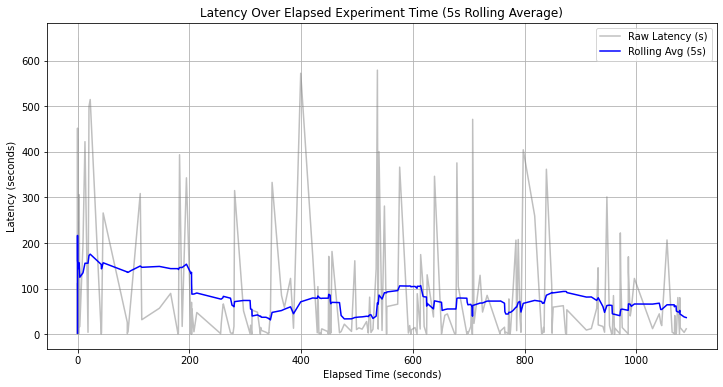

In [128]:
df['experiment_runtime'] = pd.to_datetime(df['startFirstQuery'], unit='ms')

# Convert start time to seconds
df['start_time_sec'] = df['startFirstQuery'] / 1000  # Convert ms to seconds

# Calculate elapsed time in seconds
df['elapsed_time_sec'] = df['start_time_sec'] - df['start_time_sec'].min()

# Sort values to ensure proper rolling window application
df = df.sort_values(by='elapsed_time_sec')

# Convert latency from milliseconds to seconds
df['latency_sec'] = df['latency'] / 1000  # Convert ms to sec
df['latency_rolling_sec'] = df['latency_sec'].rolling(window=20, min_periods=1).mean()

# Plot the latency curves without markers
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['elapsed_time_sec'], y=df['latency_sec'], linestyle='-', color='gray', alpha=0.5, label="Raw Latency (s)")
sns.lineplot(x=df['elapsed_time_sec'], y=df['latency_rolling_sec'], linestyle='-', color='b', label="Rolling Avg (5s)")

plt.xlabel("Elapsed Time (seconds)")
plt.ylabel("Latency (seconds)")
plt.title("Latency Over Elapsed Experiment Time (5s Rolling Average)")
plt.legend()
plt.grid(True)

plt.show()

## Spatial Query

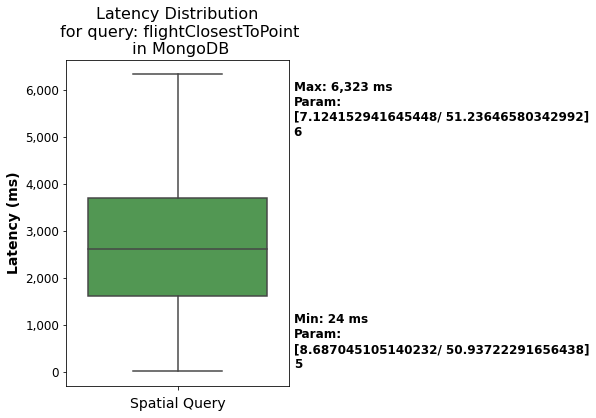

In [129]:
# Step 1: Filter for rows where queryName is 'spatialQuery'
filtered_df = mongo_spatial_df[mongo_spatial_df['queryName'] == spatialQuery]

# Step 2: Drop the first two and last two rows
trimmed_df = filtered_df.iloc[2:-2]  # Removes first two and last two rows

# Step 3: Find the rows with the maximum and minimum latency and get their parameterValues
max_latency = trimmed_df['latency'].max()
min_latency = trimmed_df['latency'].min()

max_latency_row = trimmed_df[trimmed_df['latency'] == max_latency]
min_latency_row = trimmed_df[trimmed_df['latency'] == min_latency]

# Clean parameter values: Remove "tstzspan" and replace ";" with newline for better readability
max_param_value = max_latency_row['parameterValues'].values[0].replace("tstzspan", "").replace(";", "\n")
min_param_value = min_latency_row['parameterValues'].values[0].replace("tstzspan", "").replace(";", "\n")

# Step 4: Create the boxplot for the latency column
plt.figure(figsize=(4, 6))
ax = sns.boxplot(y=trimmed_df['latency'], color="#47A248")  # MongoDB green color

# Formatting
plt.title(f"Latency Distribution\n for query: {spatialQuery}\n in MongoDB", fontsize=16)
plt.ylabel("Latency (ms)", fontsize=14, fontweight="bold")
plt.xlabel("Spatial Query", fontsize=14)

# Increase tick labels size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add thousands separators to y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Format parameter value for better readability (split into multiple paragraphs after ";")
max_param_text = f"Max: {max_latency:,.0f} ms\nParam:\n{max_param_value}"
min_param_text = f"Min: {min_latency:,.0f} ms\nParam:\n{min_param_value}"

# Annotate the maximum latency
plt.text(0.52, max_latency * 0.98, max_param_text, 
         ha='left', va='top', fontsize=12, fontweight="bold", color="black")

# Annotate the minimum latency
plt.text(0.52, min_latency * 1.05, min_param_text, 
         ha='left', va='bottom', fontsize=12, fontweight="bold", color="black")

# Get and store the y-axis limits for the second plot
y_min, y_max = ax.get_ylim()
ax.set_ylim(y_min, y_max)

# Show the plot
plt.show()


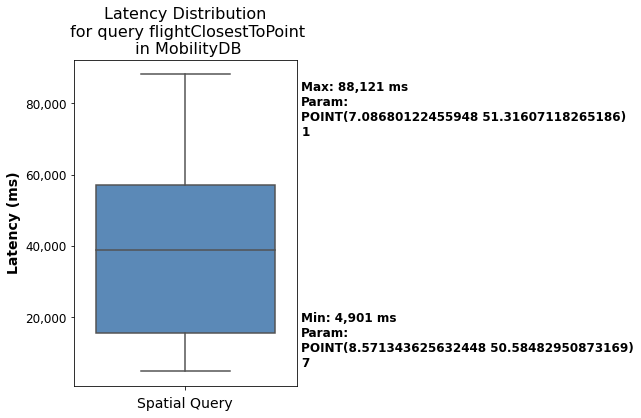

In [130]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Step 1: Filter for rows where queryName is 'spatialQuery'
filtered_df = mobility_spatial_df[mobility_spatial_df['queryName'] == spatialQuery]

# Step 2: Drop the first two and last two rows
trimmed_df = filtered_df.iloc[2:-2]  # Removes first two and last two rows

# Step 3: Find the rows with the maximum and minimum latency and get their parameterValues
max_latency = trimmed_df['latency'].max()
min_latency = trimmed_df['latency'].min()

max_latency_row = trimmed_df[trimmed_df['latency'] == max_latency]
min_latency_row = trimmed_df[trimmed_df['latency'] == min_latency]

# Clean parameter values: Remove "tstzspan" and replace ";" with newline for better readability
max_param_value = max_latency_row['parameterValues'].values[0].replace("tstzspan", "").replace(";", "\n")
min_param_value = min_latency_row['parameterValues'].values[0].replace("tstzspan", "").replace(";", "\n")

# Step 4: Create the boxplot for the latency column
plt.figure(figsize=(4, 6))
ax = sns.boxplot(y=trimmed_df['latency'], color="#4C89C6")  # PostgreSQL blue color

# Formatting
plt.title(f"Latency Distribution\n for query {spatialQuery}\n in MobilityDB", fontsize=16)
plt.ylabel("Latency (ms)", fontsize=14, fontweight="bold")
plt.xlabel("Spatial Query", fontsize=14)

# Increase tick labels size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add thousands separators to y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Format parameter value for better readability (split into multiple paragraphs after ";")
max_param_text = f"Max: {max_latency:,.0f} ms\nParam:\n{max_param_value}"
min_param_text = f"Min: {min_latency:,.0f} ms\nParam:\n{min_param_value}"

# Annotate the maximum latency
plt.text(0.52, max_latency * 0.98, max_param_text, 
         ha='left', va='top', fontsize=12, fontweight="bold", color="black")

# Annotate the minimum latency
plt.text(0.52, min_latency * 1.05, min_param_text, 
         ha='left', va='bottom', fontsize=12, fontweight="bold", color="black")

# Apply the y-axis limits from the first plot (MongoDB) to ensure consistency
# ax.set_ylim(y_min, y_max)

# Show the plot
plt.show()


## Spatio-Temporal Query

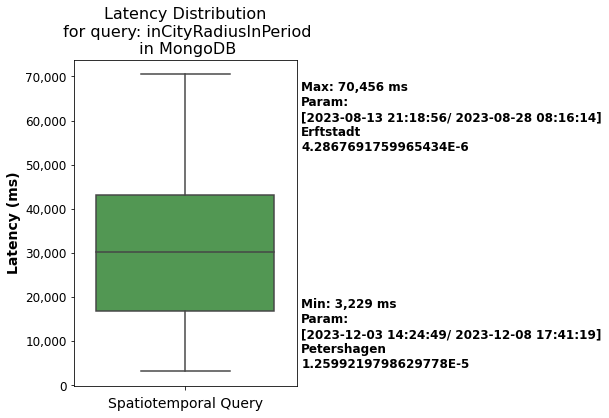

In [131]:
# Step 1: Filter for rows where queryName is 'spatiotemporalQuery'
filtered_df = mongo_st_df[mongo_st_df['queryName'] == spatiotemporalQuery]

# Step 2: Drop the first two and last two rows
trimmed_df = filtered_df.iloc[2:-2]  # Removes first two and last two rows

# Step 3: Find the rows with the maximum and minimum latency and get their parameterValues
max_latency = trimmed_df['latency'].max()
min_latency = trimmed_df['latency'].min()

max_latency_row = trimmed_df[trimmed_df['latency'] == max_latency]
min_latency_row = trimmed_df[trimmed_df['latency'] == min_latency]

max_param_value = max_latency_row['parameterValues'].values[0].replace(";", "\n")  # Replace ";" with newline
min_param_value = min_latency_row['parameterValues'].values[0].replace(";", "\n")  # Replace ";" with newline

# Step 4: Create the boxplot for the latency column
plt.figure(figsize=(4, 6))
ax = sns.boxplot(y=trimmed_df['latency'], color="#47A248")  # MongoDB green color

# Formatting
plt.title(f"Latency Distribution\n for query: {spatiotemporalQuery}\n in MongoDB", fontsize=16)
plt.ylabel("Latency (ms)", fontsize=14, fontweight="bold")
plt.xlabel("Spatiotemporal Query", fontsize=14)

# Increase tick labels size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add thousands separators to y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Format parameter value for better readability (split into multiple paragraphs after ";")
max_param_text = f"Max: {max_latency:,.0f} ms\nParam:\n{max_param_value}"
min_param_text = f"Min: {min_latency:,.0f} ms\nParam:\n{min_param_value}"

# Annotate the maximum latency
plt.text(0.52, max_latency * 0.98, max_param_text, 
         ha='left', va='top', fontsize=12, fontweight="bold", color="black")

# Annotate the minimum latency
plt.text(0.52, min_latency, min_param_text, 
         ha='left', va='bottom', fontsize=12, fontweight="bold", color="black")

# Get and store the y-axis limits for the second plot
y_min, y_max = ax.get_ylim()

# Show the plot
plt.show()


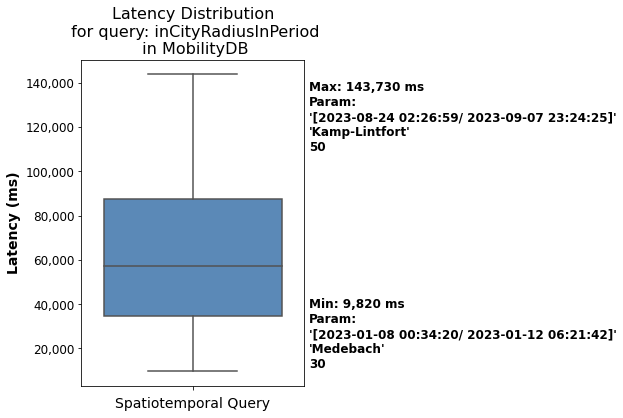

In [132]:
# Step 1: Filter for rows where queryName is 'spatiotemporalQuery'
filtered_df = mobility_st_df[mobility_st_df['queryName'] == spatiotemporalQuery]

# Step 2: Drop the first two and last two rows
trimmed_df = filtered_df.iloc[2:-2]  # Removes first two and last two rows

# Step 3: Find the rows with the maximum and minimum latency and get their parameterValues
max_latency = trimmed_df['latency'].max()
min_latency = trimmed_df['latency'].min()

max_latency_row = trimmed_df[trimmed_df['latency'] == max_latency]
min_latency_row = trimmed_df[trimmed_df['latency'] == min_latency]

max_param_value = max_latency_row['parameterValues'].values[0].replace(";", "\n")  # Replace ";" with newline
min_param_value = min_latency_row['parameterValues'].values[0].replace(";", "\n")  # Replace ";" with newline

# Step 4: Create the boxplot for the latency column
plt.figure(figsize=(4, 6))
ax = sns.boxplot(y=trimmed_df['latency'], color="#4C89C6")  # PostgreSQL/MobilityDB blue color

# Formatting
plt.title(f"Latency Distribution\n for query: {spatiotemporalQuery}\n in MobilityDB", fontsize=16)
plt.ylabel("Latency (ms)", fontsize=14, fontweight="bold")
plt.xlabel("Spatiotemporal Query", fontsize=14)

# Increase tick labels size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add thousands separators to y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Format parameter value for better readability (split into multiple paragraphs after ";")
max_param_text = f"Max: {max_latency:,.0f} ms\nParam:\n{max_param_value.replace('tstzspan', '')}"
min_param_text = f"Min: {min_latency:,.0f} ms\nParam:\n{min_param_value.replace('tstzspan', '')}"

# Annotate the maximum latency
plt.text(0.52, max_latency * 0.98, max_param_text, 
         ha='left', va='top', fontsize=12, fontweight="bold", color="black")

# Annotate the minimum latency
plt.text(0.52, min_latency, min_param_text, 
         ha='left', va='bottom', fontsize=12, fontweight="bold", color="black")

# Apply the y-axis limits from the first plot
# ax.set_ylim(y_min, y_max)

# Show the plot
plt.show()
